In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
import pathlib
import os
import random
from sklearn.model_selection import train_test_split
homePath = '/home/thanhtu98/Downloads/week3/'

# ham xu li du lieu
def preprocessdata(true, flase):
    data = []
    label = []
    imgPath = homePath + true
    imgFiles = os.listdir(imgPath)
    for image in imgFiles:
        img = cv2.imread(imgPath+ image,0)
        img = cv2.resize(img, (64, 64))
        data.append(img)
        label.append(1)
    notMap = homePath + flase
    imgFiles0 = os.listdir(notMap)
    for image in imgFiles0:
        img = cv2.imread(notMap+ image,0)
        img = cv2.resize(img, (64, 64))
        data.append(img)
        label.append(0)
    
    l = len(label)
    print(l)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    
    data = np.array(data)
    label = np.array(label)
    data = data[shutfle]
    label = label[shutfle]
    
    return data,label

data,labels = preprocessdata("train1/", "train0/")
dataG, labelsG = preprocessdata("test1/", "t/")
test_xG = np.reshape(dataG,(-1,64,64,1))
test_YG = np_utils.to_categorical(labelsG, 2)


(train_x, test_x, train_Y, test_Y) = train_test_split(data,
   labels, test_size=0.2, random_state=42)
print('Dữ liệu y ban đầu ',train_Y[0])
train_x = np.reshape(train_x,(-1,64,64,1))
train_Y = np_utils.to_categorical(train_Y, 2)
#valid_x = np.reshape(train_x,(-1,28,28,1))
#valid_Y = np_utils.to_categorical(train_y, 10)
test_x = np.reshape(test_x,(-1,64,64,1))
test_Y = np_utils.to_categorical(test_Y, 2)


print('Dữ liệu y sau one-hot encoding ',train_Y[0])
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
model.summary()


12638
414
Dữ liệu y ban đầu  0
Dữ liệu y sau one-hot encoding  [1. 0.]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
___________________________________________________

In [2]:
model.fit(train_x, train_Y, validation_split=0.2,shuffle=True,
                 batch_size=64, epochs=20, verbose=1)
model.save_weights(homePath+"model2_64_20.h5")

Epoch 1/20
127/127 [==============================] - 62s 488ms/step - loss: 1.0703 - accuracy: 0.7239 - val_loss: 0.4540 - val_accuracy: 0.8259
Epoch 2/20
127/127 [==============================] - 63s 496ms/step - loss: 0.4204 - accuracy: 0.8396 - val_loss: 0.4081 - val_accuracy: 0.8442
Epoch 3/20
127/127 [==============================] - 62s 491ms/step - loss: 0.3996 - accuracy: 0.8390 - val_loss: 0.4062 - val_accuracy: 0.8462
Epoch 4/20
127/127 [==============================] - 64s 503ms/step - loss: 0.3699 - accuracy: 0.8562 - val_loss: 0.3637 - val_accuracy: 0.8600
Epoch 5/20
127/127 [==============================] - 65s 510ms/step - loss: 0.3496 - accuracy: 0.8623 - val_loss: 0.3657 - val_accuracy: 0.8586
Epoch 6/20
127/127 [==============================] - 68s 534ms/step - loss: 0.3247 - accuracy: 0.8720 - val_loss: 0.3705 - val_accuracy: 0.8467
Epoch 7/20
127/127 [==============================] - 66s 522ms/step - loss: 0.3149 - accuracy: 0.8811 - val_loss: 0.3737 - val_ac

In [23]:
model.load_weights(homePath+"model2_64_20.h5")

In [48]:
test1 = cv2.imread(homePath+'test24.jpg',0)
test1 = cv2.resize(test1, (64, 64))
test1 = np.reshape(test1,(-1,64,64,1))
print(model.predict(test1).round())

[[0. 1.]]


In [41]:
# dau vao la duong dan cua anh (path)
# dau ra la ket qua phan loai ( co ban do hay khong )
def PrintResult(path):
    im = cv2.imread(path, 1)
    
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    #loc nhieu
    noise_removal = cv2.bilateralFilter(im_gray,9,75,75)
    #can bang sang
    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)

    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)

    canny_image = cv2.Canny(thresh_image,70,150)
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
    plt.imshow(cv2.cvtColor(dilated_image,cv2.COLOR_BGR2RGB))
    plt.show()
    contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours= sorted(contours, key = cv2.contourArea, reverse = True)
    screenCnt = None
    roi_img = []
    check = 0
    for c in contours:
        peri = cv2.arcLength(c, True) 
    #     print(peri)
        if(peri < 101):
            continue

        approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
        if len(approx) == 4:
            screenCnt = approx
            (x,y,w,h) = cv2.boundingRect(screenCnt)
            roi = im[y:y+h,x:x+w]
            roi_ccc = roi
            roi_img.append(roi)
            plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
            plt.show()
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            X_test__ = cv2.resize(roi, (64, 64))
            y_predict = model.predict(X_test__.reshape(-1,64,64,1)).round()
            return print(" y predict", y_predict)

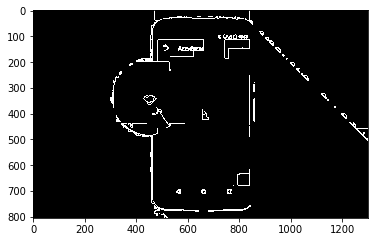

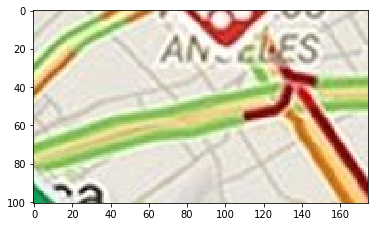

 y predict [[1. 0.]]


In [43]:
PrintResult(homePath+'test1.jpg')

In [12]:
print(classification_report(model.predict(test_x).round(), test_Y))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1399
           1       0.84      0.96      0.90      1129

   micro avg       0.90      0.90      0.90      2528
   macro avg       0.90      0.91      0.90      2528
weighted avg       0.91      0.90      0.90      2528
 samples avg       0.90      0.90      0.90      2528



In [13]:
print(classification_report(model.predict(test_xG).round(), test_YG))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       274
           1       0.64      0.88      0.74       140

   micro avg       0.79      0.79      0.79       414
   macro avg       0.78      0.82      0.79       414
weighted avg       0.83      0.79      0.80       414
 samples avg       0.79      0.79      0.79       414

